#define model

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend
from data_mgmt import DAO
import matplotlib.pyplot as plt

In [2]:
def model_define(features, drop_rate):

    tf.summary.image("laser_inst", features)

    model = models.Sequential()

    model.add(layers.Conv2D(
        32, (11,1), padding="same", input_shape=(720,1,1),
        name="conv_1" ))
    model.add(layers.Conv2D(
        64, kernel_size=(5,1), padding="same",
        name="conv_2" ))
    model.add(layers.MaxPooling2D(
        (2,1), strides=2, padding="same",
        name="pool_1" ))
    model.add(layers.Conv2D(
        256, kernel_size=(5,1), padding="same",
        name="conv_3" ))
    model.add(layers.MaxPooling2D(
        (2,1), strides=4, padding="same",
        name="pool_2" ))

    model.add(layers.Flatten())

    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(1024, activation="relu", name="dense_1"))

    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(128, activation="relu", name="dense_2"))

    model.add(layers.Dense(3, name="dense_3"))

    return model

def pos_loss(y_actual, y_pred):
    loss_value = backend.sqrt(backend.pow((y_actual[:,0]-y_pred[:,0]),2)+backend.pow((y_actual[:,1]-y_pred[:,1]),2))+(0.3*backend.sqrt(backend.pow((y_actual[:,2]-y_pred[:,2]),2)))
    return loss_value

In [3]:
filename="laser_log/laser_log.csv"

data = DAO(filename)

data.read()
data.divide_data(0.25)

In [4]:
model_cnn = model_define(data.features, 0.2)

2022-03-21 12:19:23.309450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 12:19:23.357007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 12:19:23.357254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 12:19:23.358769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 12:19:23.359242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [5]:
model_cnn.compile(optimizer = "adam",
    loss=pos_loss,
    metrics=['mean_absolute_error'])

In [11]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 720, 1, 32)        384       
                                                                 
 conv_2 (Conv2D)             (None, 720, 1, 64)        10304     
                                                                 
 pool_1 (MaxPooling2D)       (None, 360, 1, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 360, 1, 256)       82176     
                                                                 
 pool_2 (MaxPooling2D)       (None, 90, 1, 256)        0         
                                                                 
 flatten (Flatten)           (None, 23040)             0         
                                                                 
 dropout (Dropout)           (None, 23040)             0

In [6]:
data.TR_features=tf.reshape(data.TR_features,[-1,720,1,1])
data.TS_features=tf.reshape(data.TS_features,[-1,720,1,1])
data.TR_targets=tf.reshape(data.TR_targets,[-1,3])
data.TS_targets=tf.reshape(data.TS_targets,[-1,3])

In [ ]:
data.TS_targets

In [7]:
history = model_cnn.fit(data.TR_features, 
    data.TR_targets, 
    epochs=10, 
    validation_data=(data.TS_features, data.TS_targets)
    )


Epoch 1/10


2022-03-21 12:20:19.959246: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201
2022-03-21 12:20:20.938693: E tensorflow/stream_executor/cuda/cuda_blas.cc:232] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-03-21 12:20:20.938739: E tensorflow/stream_executor/cuda/cuda_blas.cc:234] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-03-21 12:20:20.958258: E tensorflow/stream_executor/cuda/cuda_blas.cc:232] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-03-21 12:20:20.958303: E tensorflow/stream_executor/cuda/cuda_blas.cc:234] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share

InternalError: Graph execution error:

Detected at node 'sequential/dense_1/MatMul' defined at (most recent call last):
    File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/ait_guest/.local/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/ait_guest/.local/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 473, in dispatch_queue
      await self.process_one()
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 462, in process_one
      await dispatch(*args)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 369, in dispatch_shell
      await result
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 664, in execute_request
      reply_content = await reply_content
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 355, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
      result = self._run_cell(
    File "/home/ait_guest/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2900, in _run_cell
      return runner(coro)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3098, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ait_guest/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3301, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ait_guest/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3361, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_9396/2888504477.py", line 1, in <cell line: 1>
      history = model_cnn.fit(data.TR_features,
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ait_guest/.local/lib/python3.9/site-packages/keras/layers/core/dense.py", line 219, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/dense_1/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential/dense_1/MatMul}}]] [Op:__inference_train_function_1237]

8/8 - 1s - loss: 0.8101 - mean_absolute_error: 0.3860 - 657ms/epoch - 82ms/step


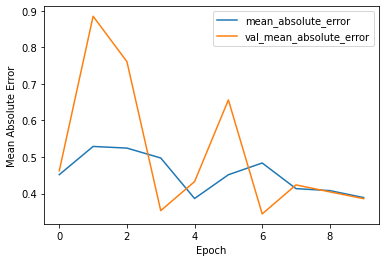

In [10]:
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'val_mean_absolute_error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

test_loss, test_acc = model_cnn.evaluate(data.TS_features,  data.TS_targets, verbose=2)


8/8 - 1s - loss: 0.9760 - mean_absolute_error: 0.4660 - 857ms/epoch - 107ms/step


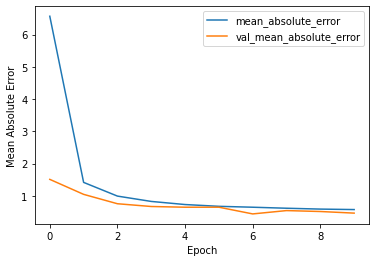

In [21]:
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'val_mean_absolute_error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

test_loss, test_acc = model_cnn.evaluate(data.TS_features,  data.TS_targets, verbose=2)
